# Random forest

In [1]:
### Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [10]:
# Load the Glass dataset
glass_data = pd.read_excel(r"C:\Users\dipak\Desktop\Pranjalee Bokade\assignments\Random Forest\Random Forest\glass.xlsx",sheet_name="glass", 
                   index_col=0)

In [11]:
glass_data.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,,,,,,,,,
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 214 entries, 1.52101 to 1.51711
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Na      214 non-null    float64
 1   Mg      214 non-null    float64
 2   Al      214 non-null    float64
 3   Si      214 non-null    float64
 4   K       214 non-null    float64
 5   Ca      214 non-null    float64
 6   Ba      214 non-null    float64
 7   Fe      214 non-null    float64
 8   Type    214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 16.7 KB


In [15]:
glass_data.describe()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
glass_data.shape

(214, 9)

## 1. Exploratory Data Analysis (EDA)

In [17]:
# Check for missing values
print(glass_data.isnull().sum())

Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


##  2.Data visualization

In [18]:
# Visualize data distributions
import matplotlib.pyplot as plt
import seaborn as sns

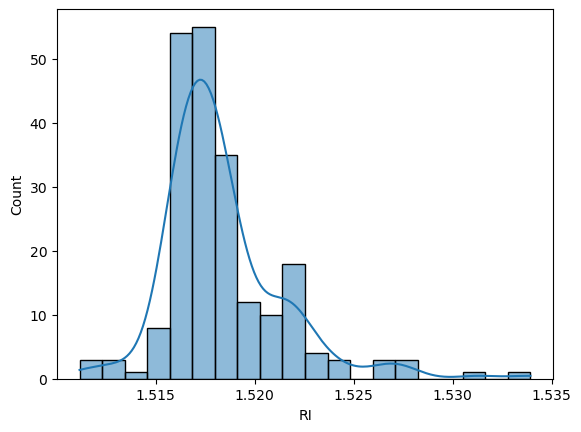

In [19]:
sns.histplot(data=glass_data, x='RI', bins=20, kde=True)
plt.show()

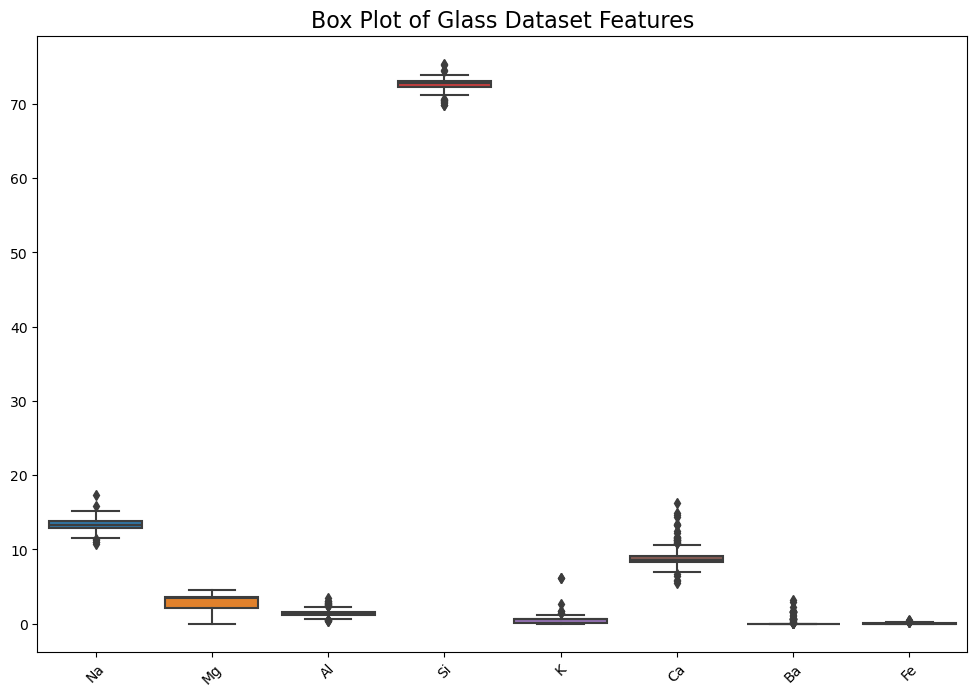

In [21]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=glass_data.drop('Type', axis=1))
plt.title('Box Plot of Glass Dataset Features', size=16)
plt.xticks(rotation=45)
plt.show()



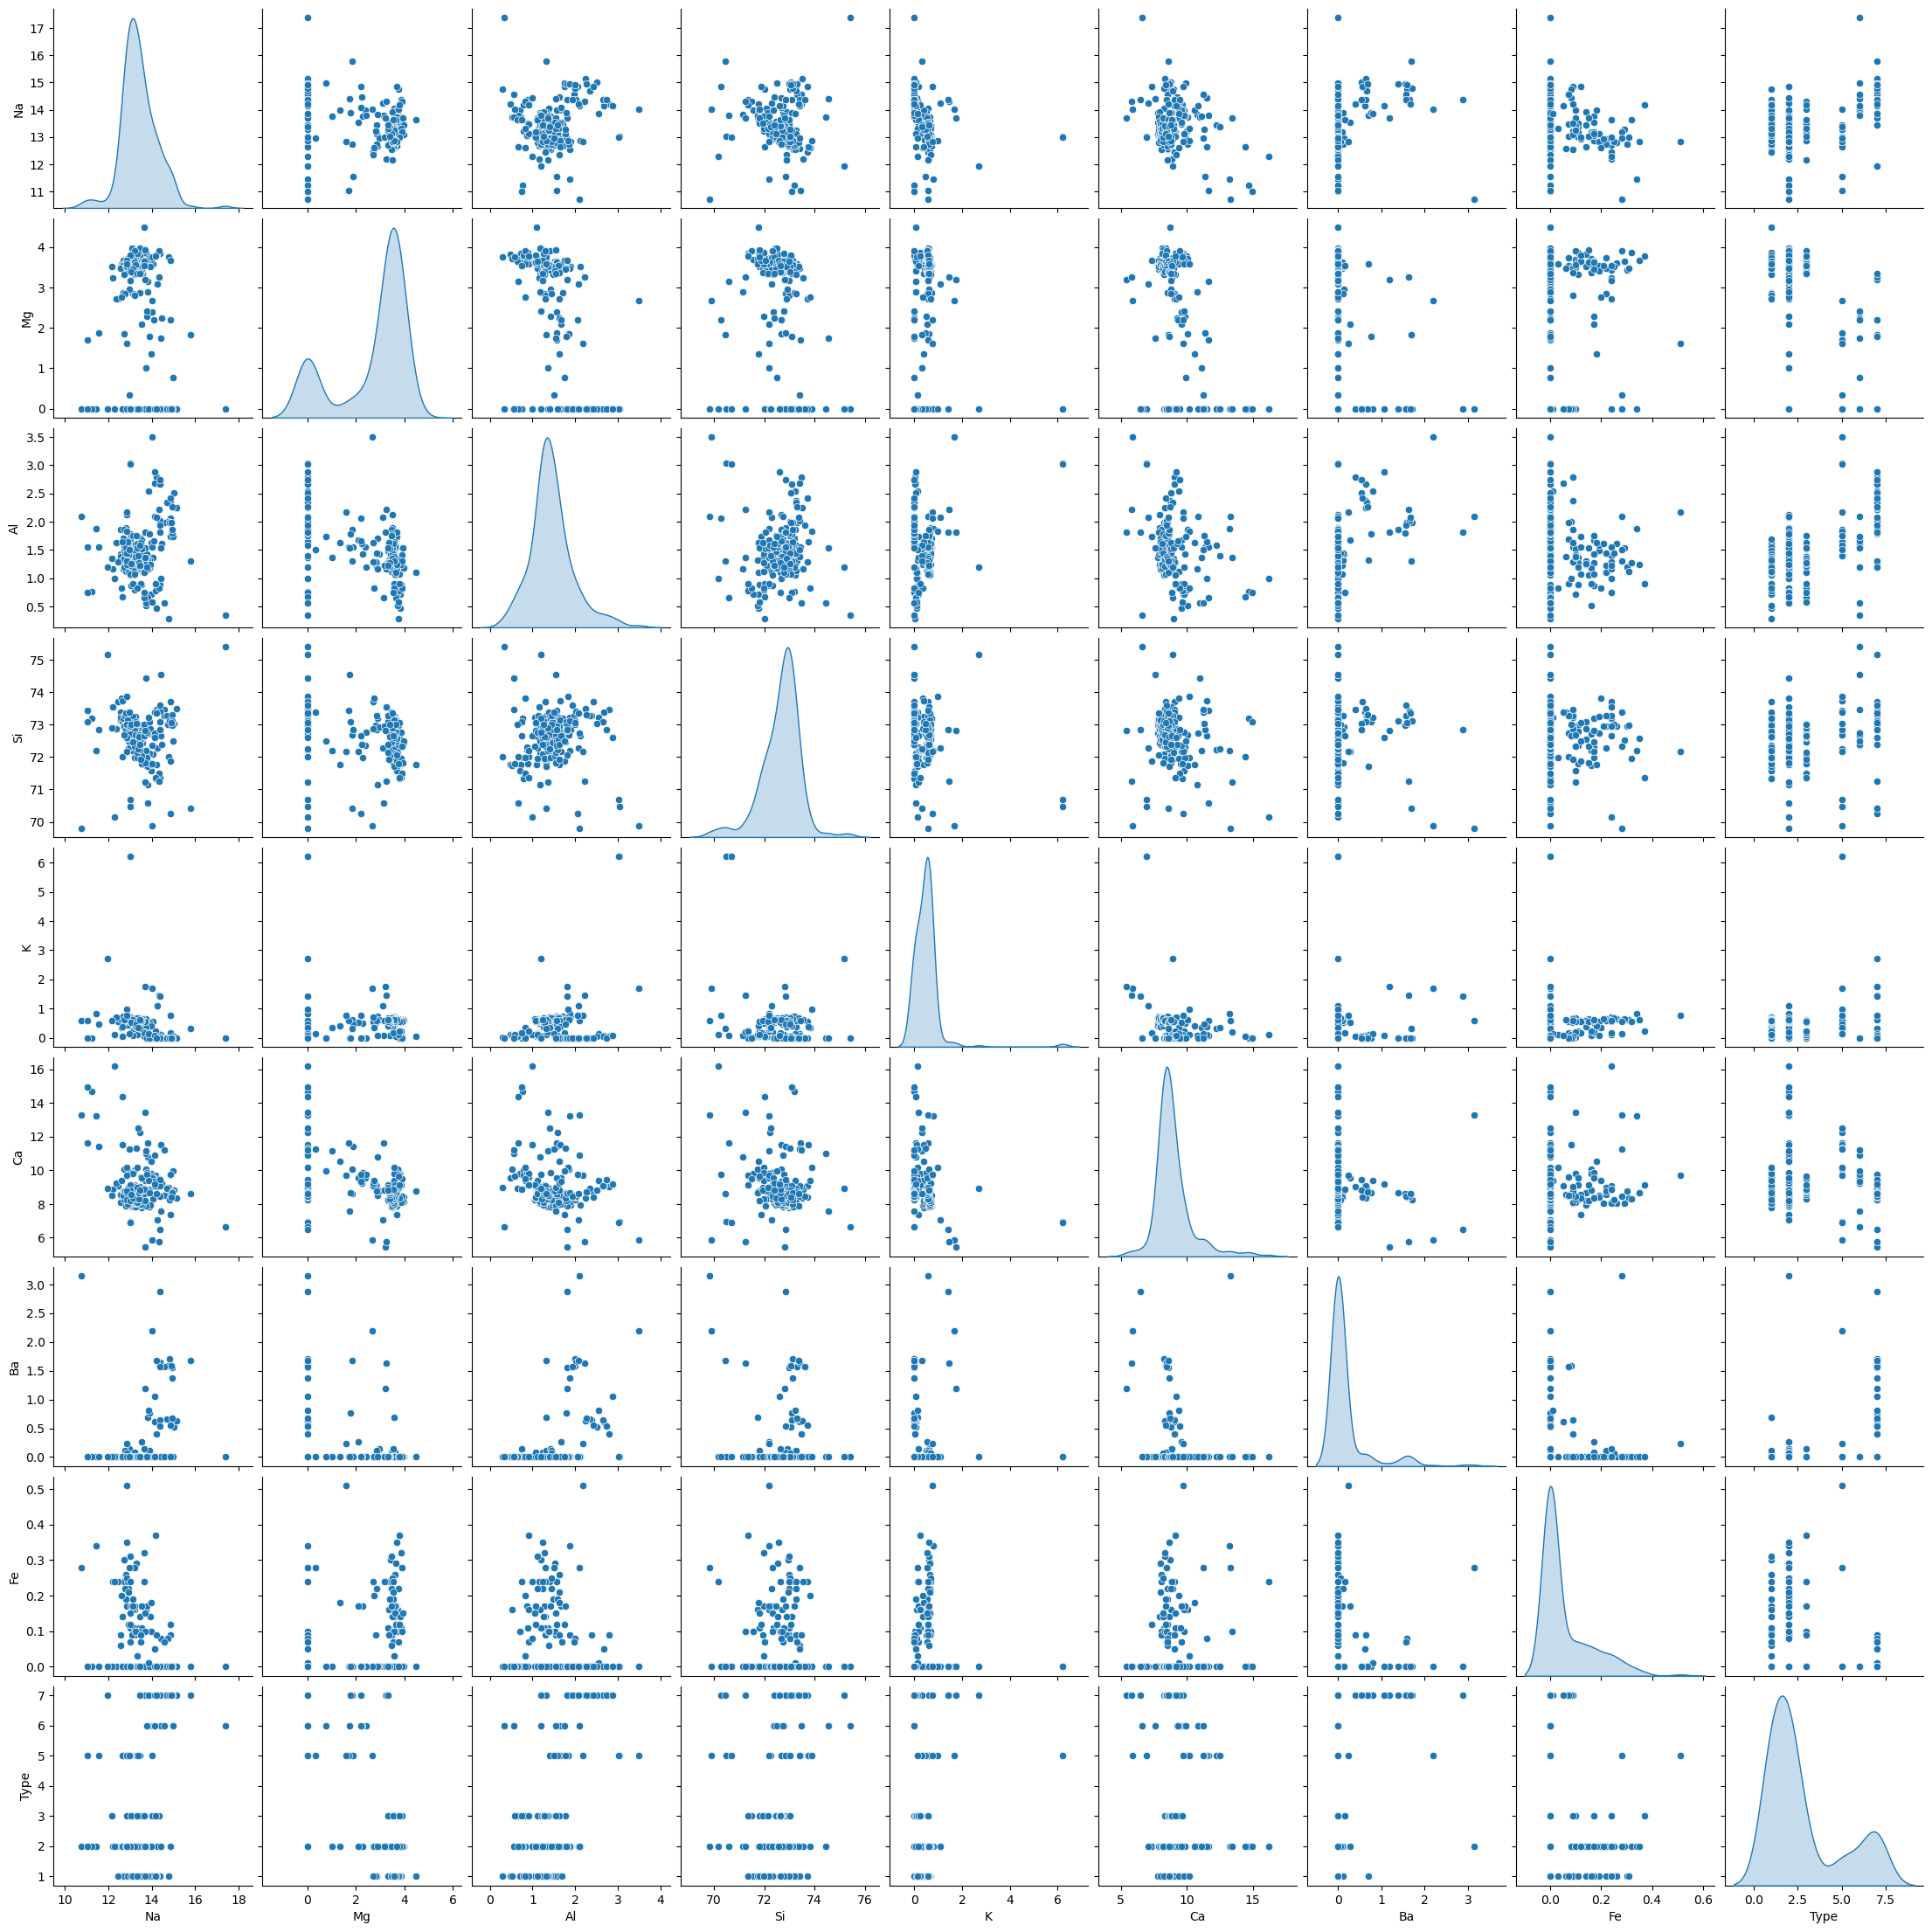

In [20]:
# Visualize relationships between features
sns.pairplot(glass_data, diag_kind='kde')
plt.show()

## 3. Data Preprocessing

In [40]:
# Handle missing values (no missing values found in this dataset)
# Encoding categorical variables (if any)

# Split the data into features and target variable
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Handling class imbalance
# Upsample minority class
glass_data_majority = glass_data[glass_data['Type'] == 1]
glass_data_minority = glass_data[glass_data['Type'] != 1]

glass_data_minority_upsampled = resample(glass_data_minority, 
                                         replace=True,     # sample with replacement
                                         n_samples=len(glass_data_majority),    # to match majority class
                                         random_state=42) # reproducible results


glass_data_upsampled = pd.concat([glass_data_majority, glass_data_minority_upsampled])

# Split upsampled data into features and target variable
X_upsampled = glass_data_upsampled.drop('Type', axis=1)
y_upsampled = glass_data_upsampled['Type']

In [45]:
X_upsampled 

,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,,,,,,,,
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
...,...,...,...,...,...,...,...,...
1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00
1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00
1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.00,0.00


In [46]:
y_upsampled

RI
1.52101    1
1.51761    1
1.51618    1
1.51766    1
1.51742    1
          ..
1.52127    3
1.51299    6
1.51687    2
1.51590    2
1.51719    7
Name: Type, Length: 140, dtype: int64


##  4. Random Forest Model Implementation

In [43]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Random Forest Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Random Forest Model Performance:
Accuracy: 0.813953488372093
Precision: 0.8295748179469109
Recall: 0.813953488372093
F1 Score: 0.8097563175538552


## 5.Bagging and Boosting techniques

In [ ]:

Bagging and Boosting techniques are already integrated into the Random Forest model, 
     so there  is no need for additional implementation when using Random Forest.Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. 
It incorporates both bagging (by training each tree on a random subset of the data) and boosting (by training each tree on the residuals of the previous trees).
As a result, Random Forest tends to perform well without requiring separate implementations of bagging or boosting techniques.

If you were using other algorithms like BaggingClassifier or GradientBoostingClassifier, 
you would need to implement bagging and boosting separately. B

   ## Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.

In [ ]:

1. Bagging (Bootstrap Aggregating):
Bagging is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms. 
It works by creating multiple independent models, each trained on a random subset of the training data.

Boosting:
Boosting is another ensemble learning technique that aims to improve the performance of weak learners by combining them into a strong learner.
Unlike bagging, boosting builds models sequentially, with each subsequent model focusing on the mistakes made by the previous ones.

Differences between Bagging and Boosting:
    
Sequential vs. Parallel: Bagging trains multiple models independently in parallel, whereas boosting trains models sequentially,  with each model learning from the mistakes of its predecessors.
Instance Weighting: Boosting assigns higher weights to misclassified instances to focus on them, while bagging treats all instances equally.
Bias-Variance Tradeoff: Bagging primarily reduces variance by averaging multiple models'
predictions, while boosting aims to reduce both bias and variance by iteratively improving the model's performance.



In [ ]:
2. Explain how to handle imbalance in the data.

In [ ]:

Handling Imbalance in the Data:

Imbalanced data occurs when the distribution of classes in the dataset is skewed, with one class having significantly fewer instances than the others. 
To handle imbalance, you can employ various techniques:

Resampling:
Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples.
Undersampling: Decrease the number of instances in the majority class by randomly removing samples.
Algorithmic Techniques:
Use algorithms that inherently handle imbalanced data well,
such as ensemble methods like Random Forest, boosting algorithms like AdaBoost and XGBoost, or algorithms with class weights.
Evaluation Metrics:
Choose appropriate evaluation metrics that are sensitive to imbalanced data, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC).